In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
pd.options.mode.chained_assignment = None

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from __future__ import division
import pprint
import pickle
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import dateutil
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [11]:
df = pd.DataFrame(pickle.load(open('../data_files/dummied_recent_data.pkl', 'rb')))

In [12]:
df.head()

,_projectid,_teacher_acctid,_schoolid,school_state,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,school_metro_suburban,school_metro_urban,teacher_gender_Female,teacher_gender_Male,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors
612442,02c7bc35161ba1b988e1c04c115c0a6f,a73f3c08cbc92234e21a515744fa6571,2f46844bf61a829e596073ace737f844,NY,1,1,1,1,1,1,...,0,1,1,0,0,0,1,0,0,0
612443,0899b88e9c28d26793af47e3c06cf26e,70cd4cde346f1119ac95add02dfe07c0,b39d78406a415f7abd50ea27735b9916,PA,0,1,0,1,1,1,...,0,1,1,0,0,1,0,0,0,0
612444,038fbbffb42416d0ca8ff46dff7ce743,ad539e8f4d9614e2af254481e97814df,023f1becba6de68d87dd599788d6428b,UT,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,0,0
612445,0c317340d757b09c7a56390cb1b5602e,557b5c4690822d7fd20140c2a22582cd,ebb0c43252024f8decb56b7f51e59007,NY,1,0,1,1,1,1,...,0,1,1,0,0,0,1,0,0,0
612446,0a89a92fadb414ac19172e889d78fe21,933ddc3b628ce2073c94f3e3fbfc63ba,ea9b3651a692286563e7bbe47f6eaa87,FL,1,1,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0


In [13]:
features = df.columns.values.tolist()

In [14]:
features

['_projectid',
 '_teacher_acctid',
 '_schoolid',
 'school_state',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'vendor_shipping_charges',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'date_posted',
 'RESP',
 'month',
 'quarter',
 'year',
 'time_to_expire',
 'optional_support',
 'school_previous_projects',
 'teacher_previous_projects',
 'log_price_including',
 'log_price_excluding',
 'sqrt_students_reached',
 'price_per_student',
 'total_state_donors',
 'total_state_projects',
 'state_avg_donors',
 'primary_focus_area_Applied Learning',
 'primary_focus_area_Health & Sports',
 'primary_focus_area_History & Civics',
 'primary_focus_area_Literacy & Language',
 'primary_focus_area_Math & Science',
 'primary_focus_area_Music & The Arts',
 'primary_focus_area_Special Needs',
 'primary_focus_s

In [30]:
original_X = df[[
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'vendor_shipping_charges',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'month',
 'quarter',
 'optional_support',
 'school_previous_projects',
 'teacher_previous_projects',
 'log_price_including',
 'log_price_excluding',
 'sqrt_students_reached',
 'price_per_student',
 'total_state_donors',
 'total_state_projects',
 'state_avg_donors',
 'primary_focus_area_Applied Learning',
 'primary_focus_area_Health & Sports',
 'primary_focus_area_History & Civics',
 'primary_focus_area_Literacy & Language',
 'primary_focus_area_Math & Science',
 'primary_focus_area_Music & The Arts',
 'primary_focus_area_Special Needs',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Financial Literacy',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutrition',
 'primary_focus_subject_Other',
 'primary_focus_subject_Parent Involvement',
 'primary_focus_subject_Performing Arts',
 'primary_focus_subject_Social Sciences',
 'primary_focus_subject_Special Needs',
 'primary_focus_subject_Team Sports',
 'primary_focus_subject_Visual Arts',
 'poverty_level_high poverty',
 'poverty_level_highest poverty',
 'poverty_level_low poverty',
 'poverty_level_moderate poverty',
 'price_ex_bins_0',
 'price_ex_bins_1',
 'price_ex_bins_2',
 'price_ex_bins_3',
 'price_ex_bins_4',
 'price_ex_bins_5',
 'price_ex_bins_6',
 'price_ex_bins_7',
 'price_ex_bins_8',
 'price_ex_bins_9',
 'student_bins_0.0',
 'student_bins_1.0',
 'student_bins_2.0',
 'student_bins_3.0',
 'student_bins_4.0',
 'student_bins_5.0',
 'student_bins_6.0',
 'student_bins_7.0',
 'student_bins_8.0',
 'student_bins_9.0',
 'price_in_bins_0',
 'price_in_bins_1',
 'price_in_bins_2',
 'price_in_bins_3',
 'price_in_bins_4',
 'price_in_bins_5',
 'price_in_bins_6',
 'price_in_bins_7',
 'price_in_bins_8',
 'price_in_bins_9',
 'price_per_student_bins_0.0',
 'price_per_student_bins_1.0',
 'price_per_student_bins_2.0',
 'price_per_student_bins_3.0',
 'price_per_student_bins_4.0',
 'price_per_student_bins_5.0',
 'price_per_student_bins_6.0',
 'price_per_student_bins_7.0',
 'price_per_student_bins_8.0',
 'price_per_student_bins_9.0',
 'grade_level_Grades 3-5',
 'grade_level_Grades 6-8',
 'grade_level_Grades 9-12',
 'grade_level_Grades PreK-2',
 'school_metro_rural',
 'school_metro_suburban',
 'school_metro_urban',
 'teacher_gender_Female',
 'teacher_gender_Male',
 'resource_type_Books',
 'resource_type_Other',
 'resource_type_Supplies',
 'resource_type_Technology',
 'resource_type_Trips',
 'resource_type_Visitors']]
y = df[['RESP']]

In [31]:
y = np.ravel(y)

std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)
print "Done scaling"

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)
print "Done splitting"

Done scaling
Done splitting


In [34]:
lookup = zip(original_X.columns, X)
lookup[17][0]

'log_price_including'

In [24]:
forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [38]:
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, lookup[indices[f]][0], importances[indices[f]]))

Feature ranking:
1. log_price_including (0.071580)
2. total_price_excluding_optional_support (0.066993)
3. log_price_excluding (0.066408)
4. total_price_including_optional_support (0.063422)
5. price_per_student (0.061119)
6. school_previous_projects (0.057082)
7. teacher_previous_projects (0.041225)
8. sqrt_students_reached (0.037798)
9. students_reached (0.037471)
10. state_avg_donors (0.037156)
11. month (0.036272)
12. total_state_donors (0.034634)
13. total_state_projects (0.034363)
14. vendor_shipping_charges (0.025235)
15. quarter (0.016085)
16. poverty_level_highest poverty (0.009649)
17. resource_type_Technology (0.009175)
18. grade_level_Grades 3-5 (0.009021)
19. poverty_level_high poverty (0.008667)
20. grade_level_Grades PreK-2 (0.008596)


TypeError: only integer arrays with one element can be converted to an index

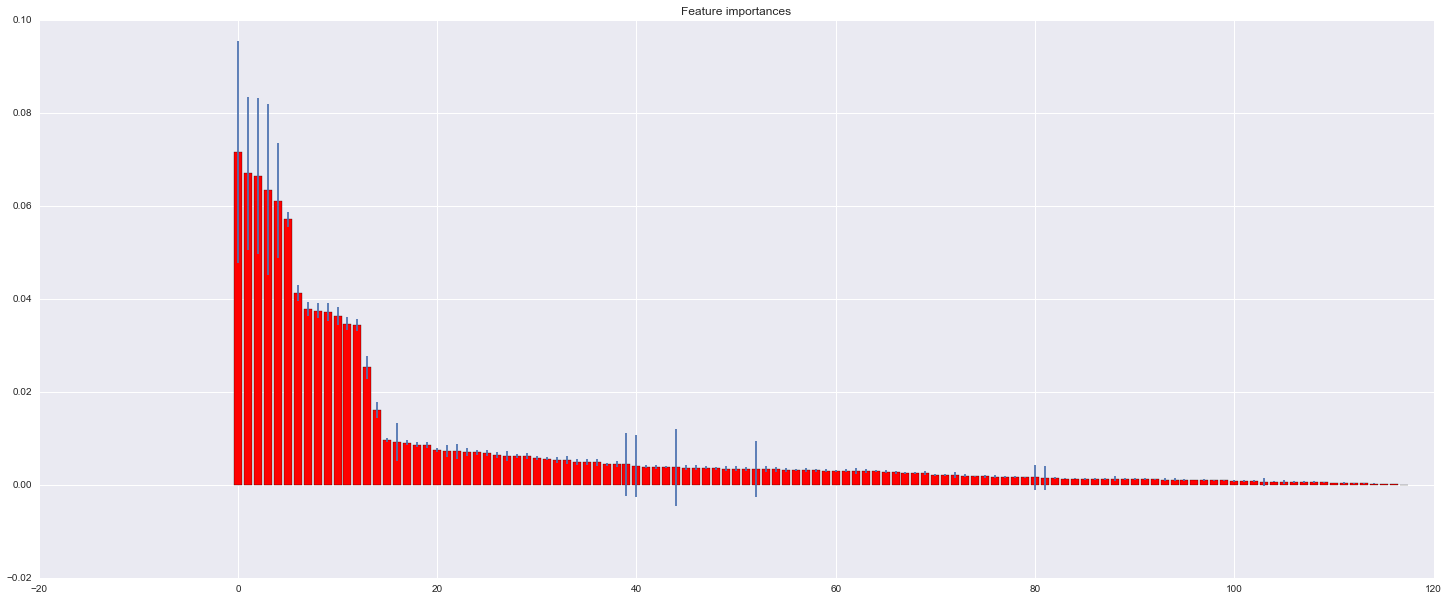

In [44]:
plt.figure(figsize = (25,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), lookup[indices], rotation = 90)
plt.xlim([-1, len(indices)])
plt.show()